In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [24]:
#Analyze datasets
print(customers.head())
print("\n")
print(products.head())
print("\n")
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

In [20]:
#check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [28]:
#Merge Datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


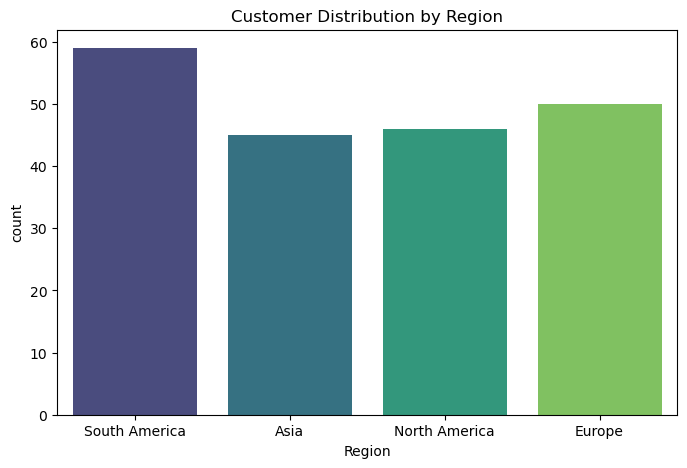

In [44]:
#Task 1
#EDA - Customer Analysis

print(customers['Region'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


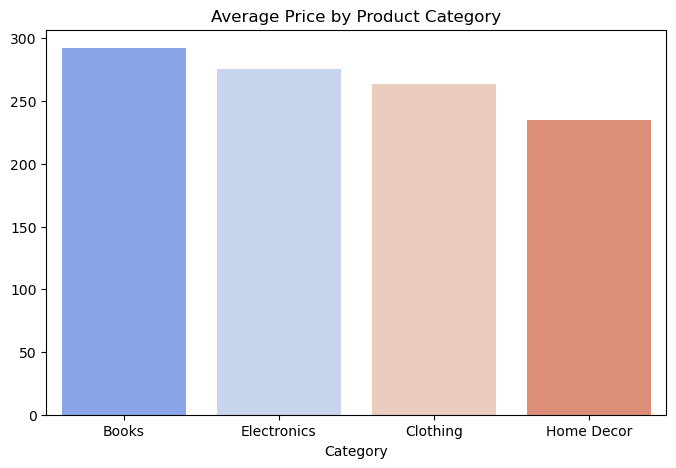

In [35]:
#EDA - Product Analysis

top = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(top)
plt.figure(figsize=(8, 5))
sns.barplot(x=top.index, y=top.values, palette='coolwarm')
plt.title('Average Price by Product Category')
plt.show()

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Name: TotalValue, dtype: float64


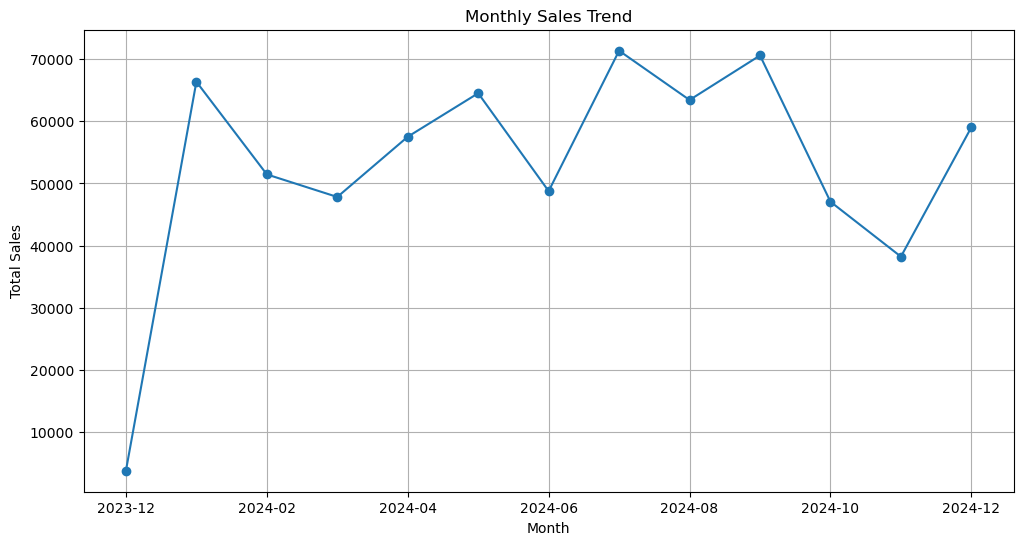

In [37]:
#EDA - Transaction Analysis

monthly_sales = transactions.groupby(transactions['TransactionDate'].str[:7])['TotalValue'].sum()
print(monthly_sales)
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()